In [5]:
import numpy as np

np.random.seed = 42
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [6]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs.shape

(2000, 2)

In [7]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
targets.shape

(2000, 1)

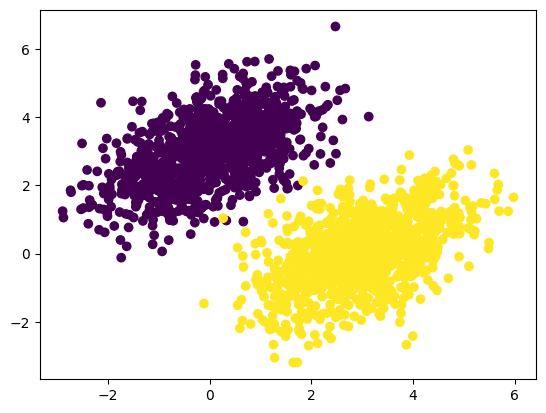

In [9]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [11]:
import tensorflow as tf
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [12]:
# tensorflow : __call__(), pytorch : forward() => 정방향 패스 설정
def model(inputs):
    return tf.matmul(inputs, W) + b # 예측값

In [13]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [14]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [15]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 0.1009
1번째 스텝의 손실: 0.0843
2번째 스텝의 손실: 0.0790
3번째 스텝의 손실: 0.0741
4번째 스텝의 손실: 0.0697
5번째 스텝의 손실: 0.0657
6번째 스텝의 손실: 0.0621
7번째 스텝의 손실: 0.0587
8번째 스텝의 손실: 0.0557
9번째 스텝의 손실: 0.0530
10번째 스텝의 손실: 0.0505
11번째 스텝의 손실: 0.0482
12번째 스텝의 손실: 0.0461
13번째 스텝의 손실: 0.0443
14번째 스텝의 손실: 0.0425
15번째 스텝의 손실: 0.0410
16번째 스텝의 손실: 0.0396
17번째 스텝의 손실: 0.0383
18번째 스텝의 손실: 0.0371
19번째 스텝의 손실: 0.0360
20번째 스텝의 손실: 0.0351
21번째 스텝의 손실: 0.0342
22번째 스텝의 손실: 0.0334
23번째 스텝의 손실: 0.0326
24번째 스텝의 손실: 0.0320
25번째 스텝의 손실: 0.0314
26번째 스텝의 손실: 0.0308
27번째 스텝의 손실: 0.0303
28번째 스텝의 손실: 0.0299
29번째 스텝의 손실: 0.0295
30번째 스텝의 손실: 0.0291
31번째 스텝의 손실: 0.0287
32번째 스텝의 손실: 0.0284
33번째 스텝의 손실: 0.0281
34번째 스텝의 손실: 0.0279
35번째 스텝의 손실: 0.0277
36번째 스텝의 손실: 0.0274
37번째 스텝의 손실: 0.0272
38번째 스텝의 손실: 0.0271
39번째 스텝의 손실: 0.0269


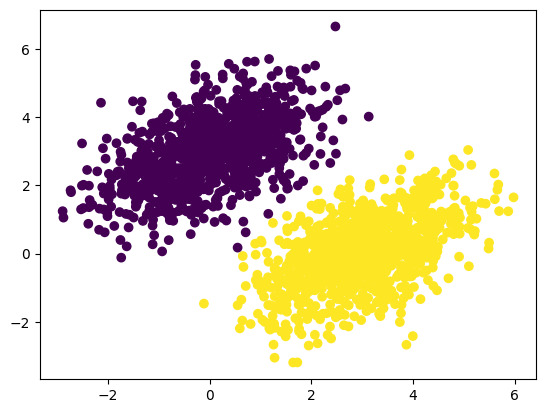

In [16]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

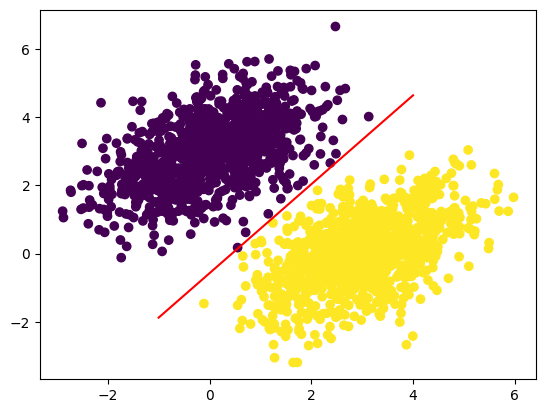

In [17]:
x = np.linspace(-1, 4, 100)
# 사실 100개의 x 축 좌표를 만들 필요 없이 시작과 종료 위치만 있어도 됩니다.
# x = [-1, 4]
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()